In [1]:
import networkx as nx

NUMBER_OF_NODES = 100
NUMBER_OF_EDGES = [300, 600, 900]
SEED = 13

datasets = []

for number in NUMBER_OF_EDGES:
    datasets.append(
        {
            "name": f"{NUMBER_OF_NODES}:{number}",
            "graph": nx.relabel.convert_node_labels_to_integers(
                nx.generators.dense_gnm_random_graph(NUMBER_OF_NODES, number, seed=SEED)
            ),
        }
    )

datasets.append(
    {
        "name": f"ER:{NUMBER_OF_NODES}:{0.15}",
        "graph": nx.relabel.convert_node_labels_to_integers(
            nx.generators.erdos_renyi_graph(NUMBER_OF_NODES, 0.15, seed=SEED)
        ),
    }
)

In [2]:
from copy import deepcopy
from solvers.dNNMIS import DNNMIS
from solvers.ILPMIS import ILPMIS
from solvers.dNNMIS_SAM import DNNMIS_SAM
from solvers.dNNMIS_Subgraph import DNNMIS_SUBGRAPH
from solvers.KaMIS import ReduMIS
import matplotlib.pyplot as plt


def benchmark(datasets, solvers):
    solutions = []

    for solver in solvers:
        for dataset in datasets:
            solver_instance = solver["class"](dataset["graph"], solver["params"])
            solver_instance.solve()
            solution = {
                "solution_method": solver["name"],
                "dataset_name": dataset["name"],
                "data": deepcopy(solver_instance.solution),
                "time_taken": deepcopy(solver_instance.solution_time),
            }
            solutions.append(solution)
            del solver_instance

    return solutions


solvers = [
    {
        "name": "dNN",
        "class": DNNMIS,
        "params": {
            "learning_rate": 0.001,
            "selection_criteria": 0.8,
            "max_steps": 6500,
        },
    },
    {
        "name": "dNN w/SAM",
        "class": DNNMIS_SAM,
        "params": {
            "learning_rate": 0.001,
            "selection_criteria": 0.8,
            "max_steps": 6500,
        },
    },
    {
        "name": "dNN w/SG5k",
        "class": DNNMIS_SUBGRAPH,
        "params": {
            "learning_rate": 0.001,
            "selection_criteria": 0.8,
            "max_steps": 5000,
            "max_subgraph_steps": 500,
        },
    },
    {"name": "ReduMIS", "class": ReduMIS, "params": {"seed": 13, "time_limit": 60}},
    {"name": "ILP", "class": ILPMIS, "params": {}},
]

solutions = benchmark(datasets, solvers)

Training step: 0, Output: 3757.5947, Desired Output: -5000.0000
Training step: 1, Output: 3723.7158, Desired Output: -5000.0000
Training step: 2, Output: 3690.2764, Desired Output: -5000.0000
Training step: 3, Output: 3656.9678, Desired Output: -5000.0000
Training step: 4, Output: 3623.6523, Desired Output: -5000.0000
Training step: 5, Output: 3590.3540, Desired Output: -5000.0000
Training step: 6, Output: 3557.2212, Desired Output: -5000.0000
Training step: 7, Output: 3524.3152, Desired Output: -5000.0000
Training step: 8, Output: 3491.7993, Desired Output: -5000.0000
Training step: 9, Output: 3459.6580, Desired Output: -5000.0000
Training step: 10, Output: 3427.8638, Desired Output: -5000.0000
Training step: 11, Output: 3396.2000, Desired Output: -5000.0000
Training step: 12, Output: 3364.7739, Desired Output: -5000.0000
Training step: 13, Output: 3333.5708, Desired Output: -5000.0000
Training step: 14, Output: 3302.4658, Desired Output: -5000.0000
Training step: 15, Output: 3271.534

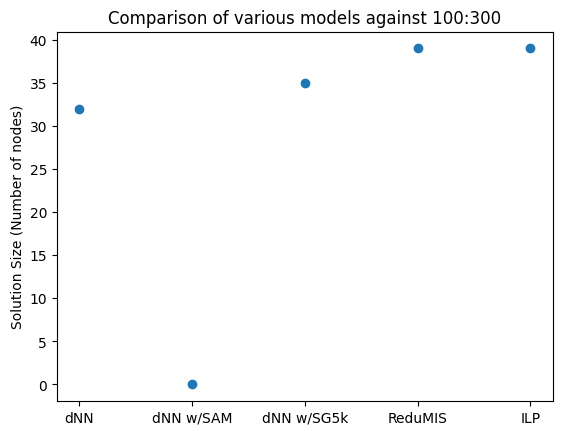

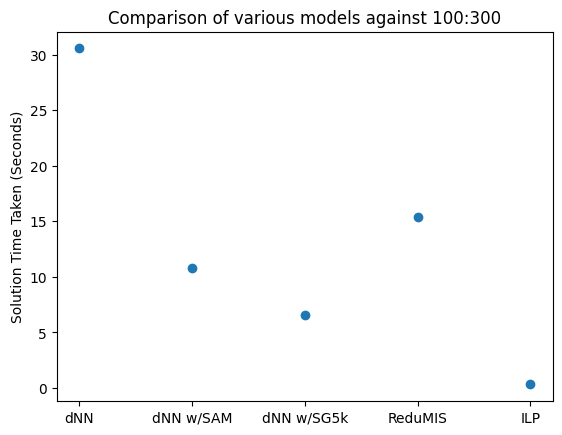

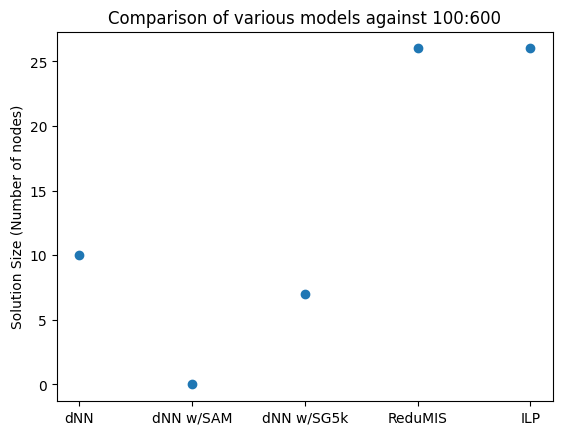

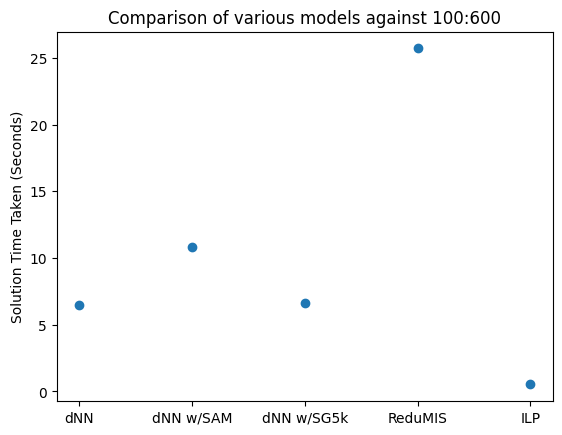

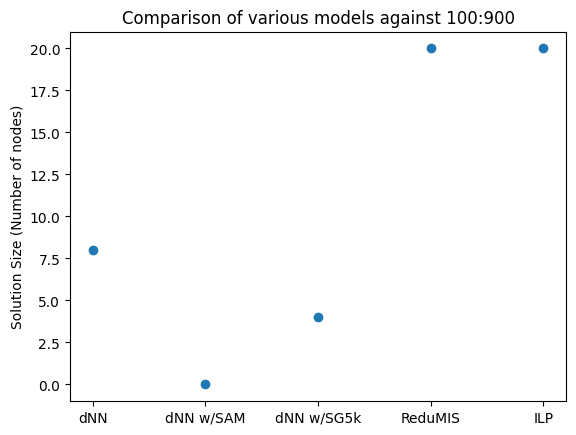

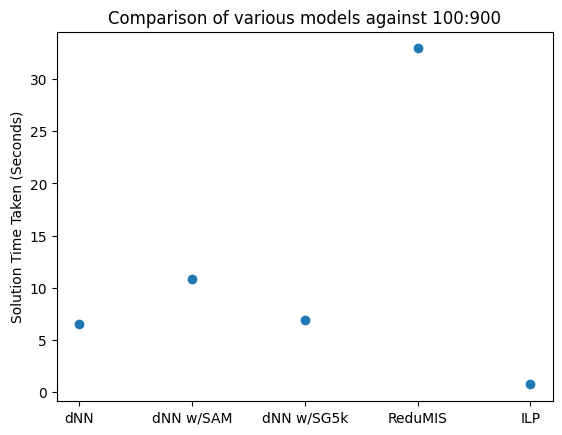

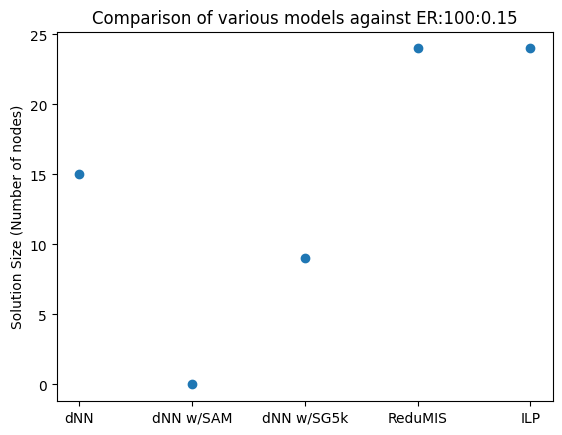

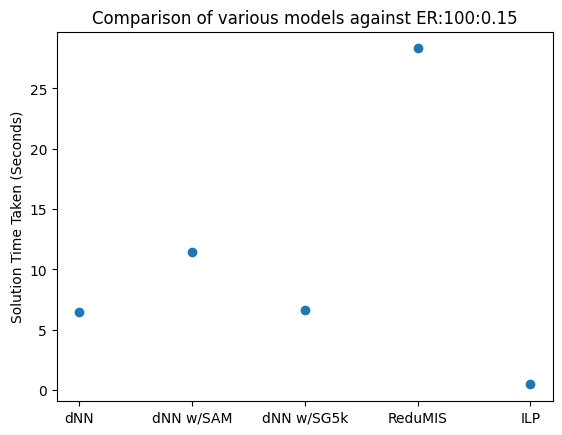

In [4]:
import numpy

dataset_index = {k: v for v, k in enumerate([dataset["name"] for dataset in datasets])}
datasets_solutions = [[] for i in range(len(datasets))]


for solution in solutions:
    dsi = dataset_index[solution["dataset_name"]]
    datasets_solutions[dsi].append(solution)

for dataset_solutions in datasets_solutions:
    # IS CHECK
    for solution in dataset_solutions:
        IS_set = solution["data"]["graph_mask"]
        subgraph = datasets[dataset_index[solution["dataset_name"]]]["graph"].subgraph(
            IS_set
        )
        if len(subgraph.edges) > 0:
            print(
                f"Non IS found using {solution['solution_method']} on {solution['dataset_name']}"
            )

    plt.plot(
        [solution["solution_method"] for solution in dataset_solutions],
        [solution["data"]["size"] for solution in dataset_solutions],
        "o",
    )
    plt.ylabel("Solution Size (Number of nodes)")
    plt.title(
        f"Comparison of various models against {dataset_solutions[0]['dataset_name']}"
    )
    plt.show()

    plt.plot(
        [solution["solution_method"] for solution in dataset_solutions],
        [solution["time_taken"] for solution in dataset_solutions],
        "o",
    )
    plt.ylabel("Solution Time Taken (Seconds)")
    plt.title(
        f"Comparison of various models against {dataset_solutions[0]['dataset_name']}"
    )
    plt.show()

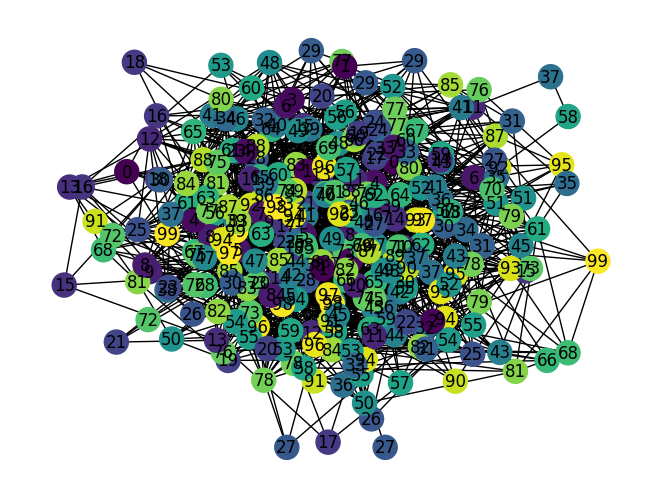

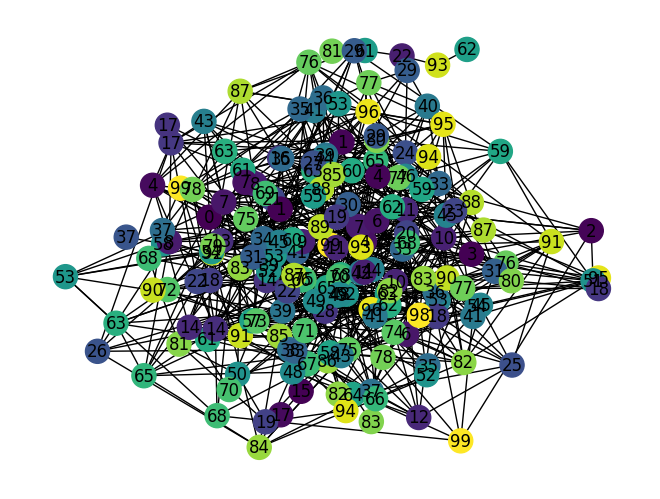

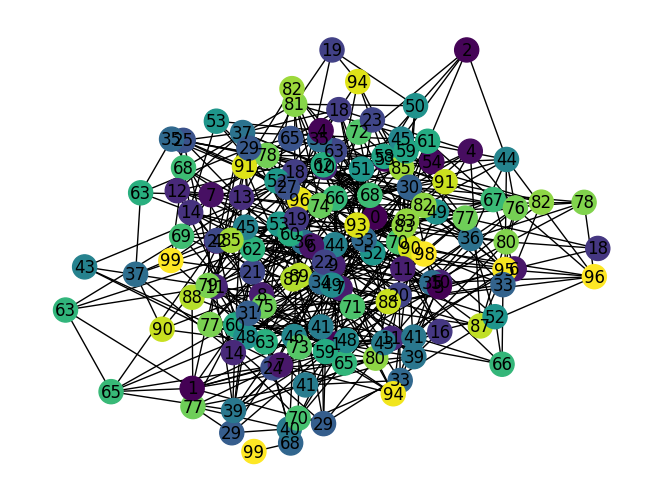

In [25]:
import numpy
import matplotlib.pyplot as plt

dataset_index = {k: v for v, k in enumerate([dataset["name"] for dataset in datasets])}
datasets_subgraph_solutions = [[] for i in range(len(datasets))]


for solution in solutions:
    dsi = dataset_index[solution["dataset_name"]]
    datasets_subgraph_solutions[dsi].append(solution)

for dataset_solutions in datasets_subgraph_solutions:
    figure_num = 1
    for solution in dataset_solutions:
        if solution["solution_method"] == "dNN w/SG5k":
            subgraphs = []
            for subgraph in solution["data"]["subgraphs"]:
                subgraphs.append(subgraph)

            for ids, subgraph_solution in enumerate(
                solution["data"]["subgraph_probabilities"]
            ):
                plt.figure(figure_num)
                nx.draw(subgraphs[ids], with_labels=True, node_color=subgraph_solution)
                figure_num += 1